<div class="alert alert-block alert-success">
    


## <center> Develop a Greedy Algorithm  </center>

</div>
    
    

<div class="alert alert-info">



        
Please use a greedy algorithm to solve this week's assignment. There are many ways to solve any problem so whatever solution seems appropriate to you for this week, utilize it and then explain your reasons for choosing it.  Greedy algorithms is just a concept, there is no particular algorithm that is called 'greedy algorithm', rather many of the existing algorithms use 'greedy' technique, for example, Breadth-first search and Dijkstra’s algorithm are some examples of greedy algorithms

<br>
    
Assume you run a small security company that provides physical security services in the area and you recently won a new contract in the area to provide 24x7 security to a small building under construction.  For simplicity we will design the solution for only 24 hours, but if you want to go above and beyond, feel free to write code that handles the 24x7 scenario as well.

<br>
    
You have 6 security guards available at the moment who you can assign to this building but your goal is to make more money out of this contract and spend less in wages (hence greedy!)

<br>
    
The cost/wage structure is as follows:

- People working less than or equal to 8 hours will be paid ($15/hr)

- Anyone working overtime (>8 hours) will be paid an additional $5, i.e. $20/hr

<br>


Create a greedy algorithm (come up with any algorithm of your own) that finds you the most cost effective solution e.g. Should we appoint 2 security guards for 12 hours each? Or 3 of them for 8 hours each? Or 4 for 6 hours each? Or all 6 for 4 hours each? Or any other combination?

<br>

Write the greedy algorithm, run it, and record the solution that your algorithm produces.  Please answer the following questions regarding your solution:
- Explain your algorithm in detail.  How is it greedy?
- What is the complexity of your solution?
- Did the greedy algorithm provide the best solution or could there be an alternative/better solution to your problem?  - Why or why not?
- If the scenario had different values for the inputs would your algorithm still be successful?  Eg. more than 24 hours, higher overtime, shorter shifts, or values that don't factor so nicely.  Why or why not?  
- What things would change the optimal output?
- If you were not constrained to a greedy algorithm, what approaches would you take to solve the problem?  


    
</div>


In [1]:
# imports
import datetime 
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

### Create a greedy algorithm

In [2]:
# set up the problem
# scenario: 24 hours x 7 days

# create a building schedule for the week
# need to staff 24 * 7 = 168 hours
hours = [(datetime.time(ii).strftime('%I%p')) for ii in range(24)]
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
timeslots = list(itertools.product(days, hours))
building_schedule = {xx:None for xx in timeslots}

# have 6 security guards
guards = ['A', 'B', 'C', 'D', 'E', 'F']

# create a guard schedule for the week
timeslots = list(itertools.product(guards, days))
guard_schedule = {xx: {dd:0 for dd in days} for xx in guards}

# for iterating/cycling through guards
g = itertools.cycle(guards)

# wage information for calculating costs
regular_wage = 15
overtime_wage = 20

In [3]:
# create greedy algorithm
# algorithm rules are explained in detail below
# briefly: 
# iterate through open timeslots and schedule the current guard if they are below the daily overtime limit
# if they are in overtime, try to schedule a different guard who is below the daily overtime limit
# if all guards are above the daily overtime limit, split remaining hours of the day between all guards

def assign_guard(daily_limit=8, tries=0, verbose=False):
    # daily_limit: default 8 hours, over which overtime applies
    # tries: keep track of whether we have cycled through all guards 
    # (i.e. whether daily overtime limits have been reached for all guards)
    # verbose: print statements for sanity check
    global current_guard  
    daily_limit_check = guard_schedule[current_guard][kk[0]] < daily_limit
    if verbose: print(guard_schedule[current_guard])
    if daily_limit_check: 
        # base case: daily overtime limit not reached, OK to assign guard to slot 
        if verbose: print(f'OK to assign guard {current_guard}')
        building_schedule[kk] = current_guard
        guard_schedule[current_guard][kk[0]] += 1

    else:
        if verbose: print(f'NOT OK to assign guard {current_guard}')
        current_guard = next(g) # next guard in the cycle
        if verbose: print(f'change guard to {current_guard}')
        tries += 1
        if verbose: print(f'change attempts: {tries}')
        if tries > len(guards):
        # recursive case: daily overtime limit reached for all guards; split remaining hours between guards
        # this is only an issue for 1 or 2 guards; 3+ guards can cover 24 hours within the daily overtime limit
            assign_guard(daily_limit=24/len(guards), tries=0) 
        else:
        # recursive case: try with the next guard in the cycle
            assign_guard(tries=tries)

### Use/Run greedy algorithm

In [4]:
# run the algorithm
# define current guard and iterate through timeslots that need assignment
current_guard = next(g)
for kk in building_schedule:
    # print('\n\n',kk) # print timeslot information for sanity check
    assign_guard()

### Analysis

In [5]:
# building schedule after assignment
pd.set_option('display.max_rows', None)
tmp = {k:[v] for k,v in building_schedule.items()} 
df_building = pd.DataFrame(tmp).T.reset_index()
df_building.columns = ['day', 'hour', 'guard']

# set up background color for easier visualization
cmap = plt.cm.get_cmap('Pastel1', 6)
mycolors = [colors.rgb2hex(cmap(ii)) for ii in range(cmap.N)] 
def style_background(xx):
    color = 'white'
    if xx == guards[0]: color = mycolors[0]
    if xx == guards[1]: color = mycolors[1]
    if xx == guards[2]: color = mycolors[2]
    if xx == guards[3]: color = mycolors[3]
    if xx == guards[4]: color = mycolors[4]
    if xx == guards[5]: color = mycolors[5]
    return 'background-color: %s' % color

# display building schedule solution
df_building.style.applymap(style_background)

,day,hour,guard
0,Sun,12AM,A
1,Sun,01AM,A
2,Sun,02AM,A
3,Sun,03AM,A
4,Sun,04AM,A
5,Sun,05AM,A
6,Sun,06AM,A
7,Sun,07AM,A
8,Sun,08AM,B
9,Sun,09AM,B


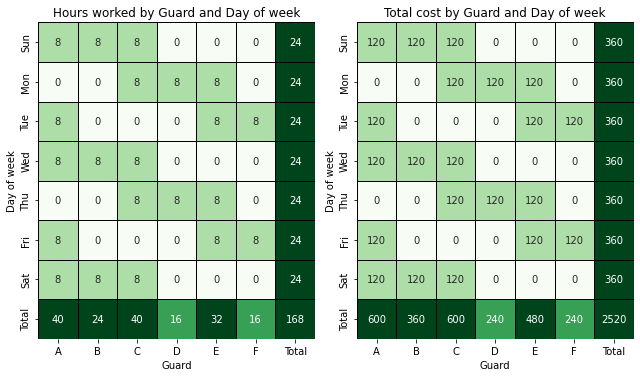

In [6]:
# guard schedule after assignment
df_guard = pd.DataFrame.from_dict(guard_schedule)
# add row and col sums
df_guard_total = df_guard.copy()
df_guard_total.loc['Total',:]= df_guard_total.sum(axis=0)
df_guard_total.loc[:,'Total'] = df_guard_total.sum(axis=1)

# compute total cost using regular and overtime wages and assigned hours
daily_limit1 = 8
df_cost = df_guard.applymap(
    lambda x: x * regular_wage if x <= daily_limit1 else 
    daily_limit1 * regular_wage + (x - daily_limit1) * overtime_wage)
# add row and col sums
df_cost_total = df_cost.copy()
df_cost_total.loc['Total',:]= df_cost_total.sum(axis=0)
df_cost_total.loc[:,'Total'] = df_cost_total.sum(axis=1)

# plot the results
fig, axs = plt.subplots(1, 2, figsize=(6*1.5, 7*1.5))
sns.heatmap(df_guard_total, cmap='Greens', lw=0.5, linecolor='k', square=True, annot=True, cbar=False, 
            vmin=0, vmax=24, fmt='.0f', ax=axs[0])
axs[0].set(ylabel='Day of week', xlabel='Guard', title='Hours worked by Guard and Day of week')

sns.heatmap(df_cost_total, cmap='Greens', lw=0.5, linecolor='k', square=True, annot=True, cbar=False, 
            vmin=0, vmax=24*regular_wage, fmt='.0f', ax=axs[1])
axs[1].set(ylabel='Day of week', xlabel='Guard', title='Total cost by Guard and Day of week')
fig.tight_layout()
plt.show()

In [7]:
# check whether total cost is optimal
print(f'Goal: minimize cost/spend the minimum in wages (${24 * len(days) * regular_wage}/week)')
if df_cost_total.loc['Total', 'Total'] <= 24 * len(days) * regular_wage:
    print('Result: goal met')
elif df_cost_total.loc['Total', 'Total'] > 24 * len(days) * regular_wage:
    print('Result: goal not met')

Goal: minimize cost/spend the minimum in wages ($2520/week)
Result: goal met


#### Explain your algorithm in detail.  How is it greedy?

The algorithm iterates through the open timeslots, and at each timeslot tries to schedule the currently selected guard.

* Rules:
    * If the currently selected guard has not exceeded the daily overtime limit of 8 hours (i.e., it is an optimal move because it avoids overtime and thus minimizes cost), the current guard is assigned to the timeslot. 
    * Continue to schedule the same guard until the current guard reaches the daily overtime limit (i.e., until it is no longer an optimal move).
    * If the currently selected guard has exceeded the daily overtime limit of 8 hours, cycle through the guards until finding a guard that has not exceeded the daily overtime limit (i.e., until there is an optimal move again). This is done by calling the function recursively.
    * If all available guards have exceeded their daily overtime limit, the daily overtime limit is relaxed and the remaining hours of the day are split between the guards (thus keeping overtime hours relatively constant between the guards). 
    * Note: the scenario where all guards exceed their daily overtime limit only occurs when the number of available guards * daily overtime limit < 24, all other variables remaining constant.

A greedy algorithm picks the optimal move at each step (i.e., picks the locally optimal solution). Here, the  algorithm does just that: at each step it picks the move that does not result in paying overtime wages, if such a move exists. In practice, it finds an optimal move and repeats it until it is no longer optimal, at which point it scans and finds another optimal move. The algorithm does not consider moves beyond the immediate next step, and the overall solution that the algorithm builds is the sum of all of the individual moves.

#### What is the complexity of your solution?
* The algorithm iterates over all timeslots (here, 24 x 7 hours), taking O(T), where T = number of timelots to schedule.
* At each timeslot, the algorithm considers which guard to assign.
    * Best case: assign the current guard after checking their daily daily overtime limit: O(1)
    * Worst case: cycle through the entire list of guards, checking the daily overtime limit of each: O(W), where W = number of workers available.
* Overall running time for worst case: O(T * W) 


* However, in practice, when the daily overtime limit is reasonable, it is unlikely that every timeslot would require cycling through all workers. 
* For this expriment (6 available workers and a daily overtime limit of 8 hours), the daily overtime limit for the current guard was exceeded 14 times during the scheduling of 168 total timeslots over 7 days. In each of these 14 instances, it was sufficient to check just the next worker in the cycle (i.e., check one more worker in the list; there was never the need to check all workers in the list). Therefore, for the given problem, the actual running time was closer to O(T) than O(T * W).  

In terms of space/memory, it should be noted that call stack space will be needed for any recursive calls. In this experiment (i.e., for the given input variables), recursive calls were not needed to schedule most of the timeslots (see above for the number of times the daily overtime limit for the current guard was exceeded). However, the maximum stack size is O(W) when cycling through all workers.

#### If the scenario had different values for the inputs would your algorithm still be successful?  Eg. more than 24 hours, higher overtime, shorter shifts, or values that don't factor so nicely.  Why or why not?  What things would change the optimal output?

The algorithm appeared be robust to different input values because the same scheduling rules (as described above) could still be applied. The algorithm will be succesful in minimizing overtime costs for:
* More than 24 hours. Here, I modeled a 24 hour x 7 days scenario.
* Different number of available workers (e.g., 1, 2, 3, 5, etc.). 
* Higher overtime wages since the design was to avoid any overtime hours if possible.
* Shorter shifts (interpreted here as smaller daily overtime limits), as long as the number of available workers * daily overtime limit >= 24 (hours need to be staffed during each day). 

If number of available workers * daily overtime limit < 24, the expected optimal output will need to be changed as overtime will be necessary to complete the schedule. In addition, it is possible that combinations of the above input variables may change the optimal output; different combinations were not systematically tested here.


Furthermore, the algorithm as currently constructed did not consider the following non-requirements:
* Even distribution of weekly hours between workers. Currently, it continues to assign timeslots to the same worker (avoiding unncessary cycling and checking the next worker) until it is no longer optimal for the current day. The daily overtime limit resets at the end of each day. The algorithm could have cycled to a new guard for each new day, but that would be one more step and it wasn't absolutely necessary. 
* Weekly overtime limit for each worker. Currently, workers could be scheduled for up to 56 hours (8 hours/day, 7 days/week) without overtime pay.

Should these or other factors become requirements, the algorithm would need to be modified to be successful. 

#### If you were not constrained to a greedy algorithm, what approaches would you take to solve the problem?  

I would try the following alternative approaches:
* Dynamic programming, where we break a problem into subproblems and solve these subproblems first. Dynamic programming can be useful when we want to optimize something given a constraint, and the problem can be broken into discrete subproblems (Bhargava, 2016).
* Linear programming methods, for example with an objective to miminize cost while subject to constraints including the daily overtime limit.

#### Did the greedy algorithm provide the best solution or could there be an alternative/better solution to your problem?  Why or why not?

The algorithm provided the best solution in terms of minimizing total cost: it completed the weekly scheduling without paying overtime.


The proposed solution is just one of many ways to solve this problem and there are no doubt faster, simpler, and/or more intuitive solutions. For example, for simplicity one could just assign the next timeslot to the next guard and repeat (i.e., slot 1: guard A, slot 2: guard B, 3:C, 4:D, 5:E, 6:F, 7:A, 8:B, etc.). This alternative solution would also result in the minimum total cost, and would not require checking against daily overtime hours since 24 hours/ 6 guards = 4 hours each (and also since all guards will approach the overtime limit at the same time).


Thus, there could be alternative solutions that are "better" by some metric(s). However, based on the stated goal of minimizing total cost, the proposed solution was optimal/best; no better outcome could be expected.

#### References

* Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.